In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('./data/data2019.csv')

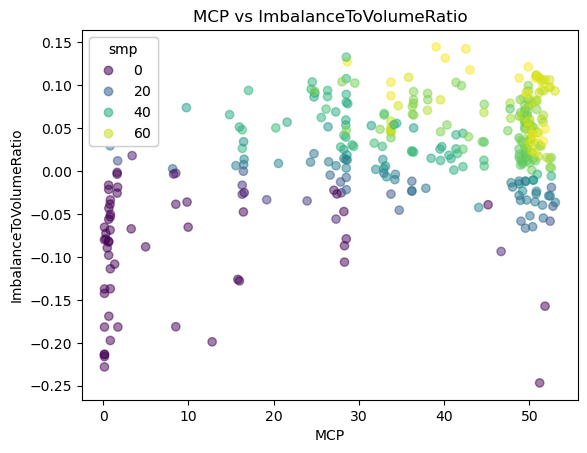

In [7]:
i = 10
w = 14
start = 24 * i * w
end = 24 * (i + 1) * w

fig, ax = plt.subplots()

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(
    dataset["mcpUsd"][start:end],
    dataset["ImbalanceToVolumeRatio"][start:end],
    c=dataset["smpUsd"][start:end],
    alpha=0.5,
)

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(num=5), loc="upper left", title="smp")
ax.add_artist(legend1)

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(
    prop="sizes",
    num=10,
)
plt.ylabel('ImbalanceToVolumeRatio')
plt.xlabel('MCP')
plt.title('MCP vs ImbalanceToVolumeRatio')
plt.show()